In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
from tensorflow import keras
import tensorflow as tf

In [0]:
dataTrain = pd.read_csv('finalcleandata.csv')

tokenizer = Tokenizer(num_words=10000, lower=True)

dataTrain = dataTrain['message']

xtrain = tokenizer.fit_on_texts(dataTrain)
xfinal = tokenizer.texts_to_sequences(dataTrain)


In [0]:
PAD = 0  # a hyperparameter
xtrain_modified = keras.preprocessing.sequence.pad_sequences(
    xfinal, value=PAD, padding='post', maxlen=64)

In [0]:
dataTrain = pd.read_csv('finalcleandata.csv')
# ytrain1 = dataTrain[['toxic','severe_toxic','obscene','threat','insult','identity_hate']] 
ytrain1 = dataTrain['toxic']
ytrain2 = dataTrain['obscene']
ytrain3 = dataTrain['insult']
ytrain4 = dataTrain['racism']
ytrain5 = dataTrain['sexism']

xt = xtrain_modified[:10000] 
xv = xtrain_modified[10000:] 

yt1 = ytrain1[:10000]
yv1 = ytrain1[10000:] 


yt2 = ytrain2[:10000]
yv2 = ytrain2[10000:] 

yt3 = ytrain3[:10000]
yv3 = ytrain3[10000:] 

yt4 = ytrain4[:10000]
yv4 = ytrain4[10000:]


yt5 = ytrain5[:10000]
yv5 = ytrain5[10000:] 




In [0]:
def model_hate_1():
  model = keras.Sequential()
  model.add(keras.layers.Embedding(10000, 200))
  model.add(keras.layers.GlobalAveragePooling1D())
  model.add(keras.layers.Dense(32, activation=tf.nn.relu))
  model.add(keras.layers.Dense(32, activation=tf.nn.relu))
  model.add(keras.layers.Dense(32, activation=tf.nn.relu))
  model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
  return model

def model_hate_2():
  model = keras.Sequential()
  model.add(keras.layers.Embedding(10000, 200))
  model.add(keras.layers.GlobalAveragePooling1D())
  model.add(keras.layers.Dense(32, activation=tf.nn.relu))
  model.add(keras.layers.Dense(32, activation=tf.nn.relu))
  model.add(keras.layers.Dense(32, activation=tf.nn.relu))
  model.add(keras.layers.Dense(32, activation=tf.nn.relu))
  model.add(keras.layers.Dense(32, activation=tf.nn.relu))
  model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))
  return model

In [0]:
model1=model_hate_2()
model2=model_hate_1()
model3=model_hate_1()
# model4=model_hate_1()
# model5=model_hate_1()

model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
# model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


# print(model.summary())

In [109]:
print("TOXIC")
history1 = model1.fit(xt,yt1,epochs=3,batch_size=64,validation_data=(xv,yv1))
print("OBSCENE")
history2 = model2.fit(xt,yt2,epochs=3,batch_size=64,validation_data=(xv,yv2))
print("INSULT")
history3 = model3.fit(xt,yt3,epochs=3,batch_size=64,validation_data=(xv,yv3))
# print("RACISM")
# history4 = model4.fit(xt,yt4,epochs=5,batch_size=16,validation_data=(xv,yv4))
# print("SEXISM")
# history5 = model5.fit(xt,yt5,epochs=5,batch_size=16,validation_data=(xv,yv5))


TOXIC
Train on 10000 samples, validate on 4046 samples
Epoch 1/3
10000/10000 [==============================] - 6s 634us/sample - loss: 0.5033 - acc: 0.7544 - val_loss: 0.3564 - val_acc: 0.8589
Epoch 2/3
10000/10000 [==============================] - 5s 483us/sample - loss: 0.2555 - acc: 0.8956 - val_loss: 0.2978 - val_acc: 0.8737
Epoch 3/3
10000/10000 [==============================] - 5s 474us/sample - loss: 0.1562 - acc: 0.9394 - val_loss: 0.3980 - val_acc: 0.8655
OBSCENE
Train on 10000 samples, validate on 4046 samples
Epoch 1/3
10000/10000 [==============================] - 6s 609us/sample - loss: 0.4638 - acc: 0.8165 - val_loss: 0.3408 - val_acc: 0.8749
Epoch 2/3
10000/10000 [==============================] - 4s 446us/sample - loss: 0.2240 - acc: 0.9141 - val_loss: 0.2555 - val_acc: 0.9086
Epoch 3/3
10000/10000 [==============================] - 4s 446us/sample - loss: 0.1287 - acc: 0.9514 - val_loss: 0.2625 - val_acc: 0.9061
INSULT
Train on 10000 samples, validate on 4046 sample

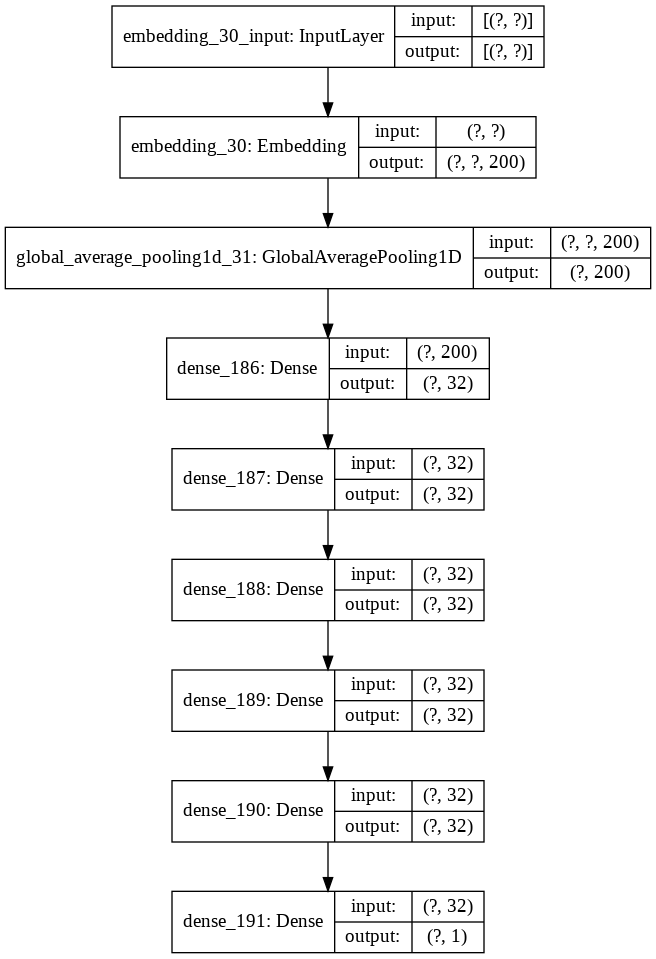

In [110]:
from tensorflow.keras.utils import plot_model
plot_model(model1,to_file='toxic.png',show_shapes=True,show_layer_names=True)

In [0]:
df = pd.read_csv('cleanTestingFinal.csv')

xtest = df['message']
xfinal = tokenizer.fit_on_texts(xtest)
xfinal = tokenizer.texts_to_sequences(xtest)

PAD = 0  # a hyperparameter
xtrain_modified = keras.preprocessing.sequence.pad_sequences(
    xfinal, value=PAD, padding='post', maxlen=64)

xtest = xtrain_modified
ytest1 = df['toxic']
ytest2 = df['obscene']
ytest3 = df['insult']
# ytest4 = df['racism']
# ytest5 = df['sexism']


In [112]:

y1 = model1.predict(xtest)
y2 = model2.predict(xtest)
y3 = model3.predict(xtest)
# y4 = model4.predict(xtest)
# y5 = model5.predict(xtest)

model1.evaluate(xtest,ytest1)
model2.evaluate(xtest,ytest2)
model3.evaluate(xtest,ytest3)
# model4.evaluate(xtest,ytest4)
# model5.evaluate(xtest,ytest5)


35119/35119 [==============================] - 3s 88us/sample - loss: nan - acc: 0.8266


[nan, 0.8266181]